In [2]:
import h5py
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import gridspec
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

GRID_SIZE = 0.06
LOWER_LAMBDA = 6472.5
UPPER_LAMBDA = 6740
PLOT_MASK = range(1475,1545)

In [3]:
hf_spec = h5py.File("/home/praveen/Documents/Research Data/resampled_emission_spectra.h5", "r")
hf_grid = h5py.File("/home/praveen/Documents/Research Data/wl_grid.h5", "r")

wl_grid = np.array(hf_grid["wl_grid"])
df = pd.DataFrame(hf_spec["spectra"])

In [4]:
hf_spec.close()
hf_grid.close()

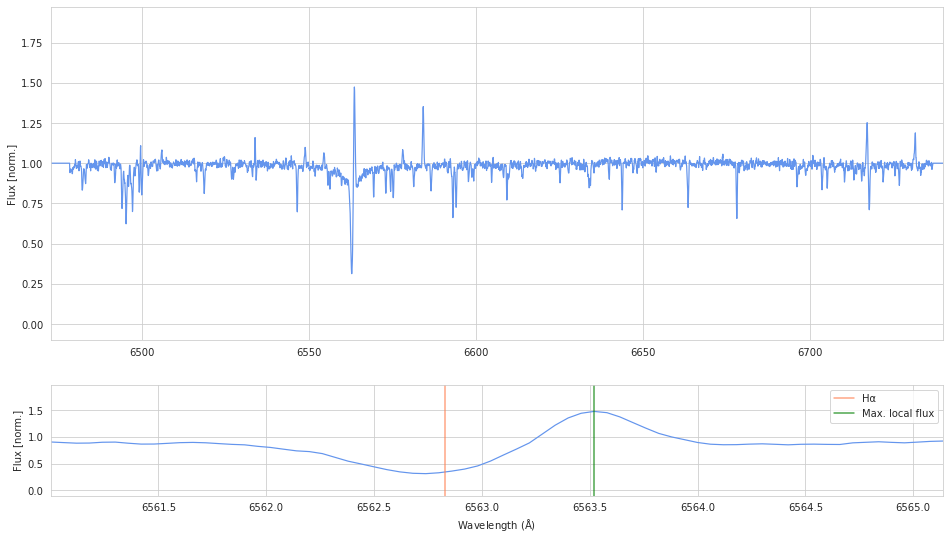

In [17]:
SAMPLE = 501
f, (ax1, ax2) = plt.subplots(2, figsize=(16,9))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.plot(wl_grid, df.loc[SAMPLE,:], color="cornflowerblue", lw=1.2, label=str(GRID_SIZE)+" $\mathrm{\AA}\ $ Sampling")
#ax1.axvline(x=6562.83, color='coral', label="Hα", alpha=0.7)
#ax1.axvline(x=wl_grid[df.columns[(df==df.loc[SAMPLE,:][PLOT_MASK].max()).iloc[SAMPLE]]], color='green', label="Max. wavelength",alpha=0.7)
ax1.set_ylabel("Flux [norm.]", size=10)
ax1.set_ylim(-0.1,df.loc[SAMPLE,:].max()+0.5)
ax1.set_xlim(wl_grid.min(), wl_grid.max() )
#ax1.legend()

ax2.plot(wl_grid[PLOT_MASK], df.loc[SAMPLE,:][PLOT_MASK], color="cornflowerblue", lw=1.2)
ax2.axvline(x=6562.83, color='coral', label="Hα", alpha=0.7)
ax2.axvline(x=wl_grid[df.columns[(df==df.loc[SAMPLE,:][PLOT_MASK].max()).iloc[SAMPLE]]], color='green', label="Max. local flux",alpha=0.7)
ax2.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=10)
ax2.set_ylabel("Flux [norm.]", size=10)
ax2.set_ylim(-0.1,df.loc[SAMPLE,:][PLOT_MASK].max()+0.5)
ax2.set_xlim(wl_grid[PLOT_MASK].min(), wl_grid[PLOT_MASK].max())
ax2.legend()

plt.show()

In [150]:
df.columns[(df==df.loc[SAMPLE,:][PLOT_MASK].max()).iloc[SAMPLE]]

Int64Index([1484], dtype='int64')

In [151]:
wl_grid[df.columns[(df==df.loc[SAMPLE,:][PLOT_MASK].max()).iloc[SAMPLE]]]

array([6561.54])

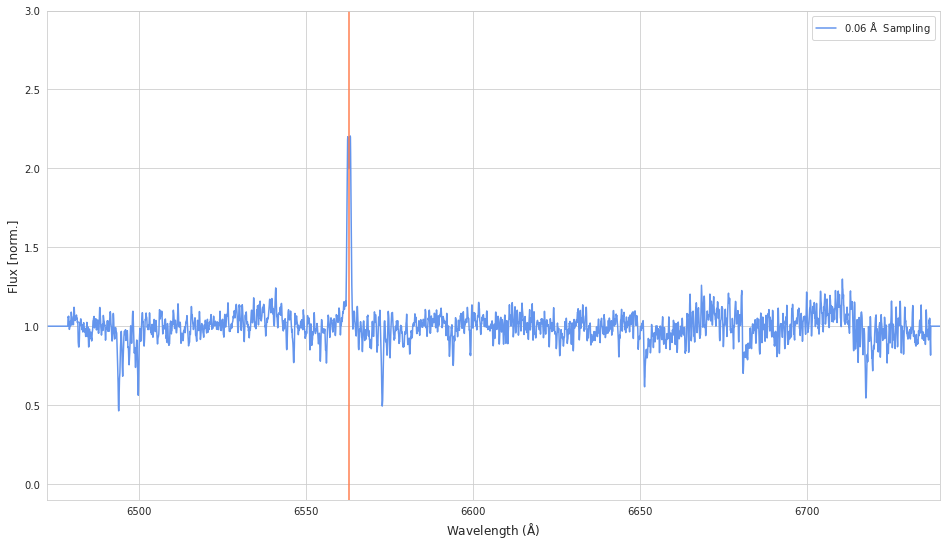

In [9]:
f, ax = plt.subplots(figsize=(16,9))
ax.plot(wl_grid, df.loc[3484,:], color="cornflowerblue", lw=1.5, label=str(GRID_SIZE)+" $\mathrm{\AA}\ $ Sampling")
plt.axvline(x=6562.83, color='coral')
ax.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=12)
ax.set_ylabel("Flux [norm.]", size=12)
ax.set_ylim(-0.1,3.0)
ax.set_xlim(wl_grid.min(), wl_grid.max() )
ax.legend()
plt.show()

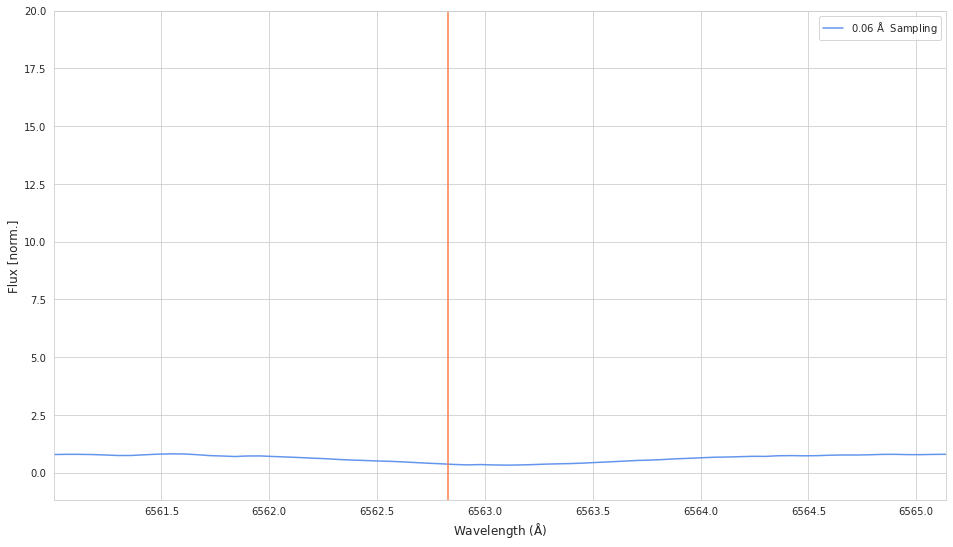

In [155]:
f, ax = plt.subplots(figsize=(16,9))
ax.plot(wl_grid[PLOT_MASK], df.loc[0,:][PLOT_MASK], color="cornflowerblue", lw=1.5, label=str(GRID_SIZE)+" $\mathrm{\AA}\ $ Sampling")
plt.axvline(x=6562.83, color='coral')
ax.set_xlabel("Wavelength ($\mathrm{\AA}$)", size=12)
ax.set_ylabel("Flux [norm.]", size=12)
ax.set_ylim((df.loc[0,:][PLOT_MASK].min()- 1.50),(20))
ax.set_xlim(wl_grid[PLOT_MASK].min(), wl_grid[PLOT_MASK].max() )
ax.legend()
plt.show()